In [ ]:
!pip install ml_insights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 53.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for splinecalib: filename=splinecalib-0.0.9-cp310-cp310-linux_x86_64.whl size=156851 sha256=ed46add5836f66703721a510e2e0870bb0252197f865dd7d79f15497dbec1e1a
  Stored in directory: /root/.cache/pip/wheels/9f/b7/8e/873782c91e93ea3cac697b3700b6a92b34fd75da7a7d18ee43
Successfully built splinecalib


Different things we need to predict:
* Game prediction (Predictive Win Analysis)
* pitch prediction (Predictive Pitch Analysis)
* Predictive Hit Analysis
* Predictive Team Season Analysis
* Predictive Player Season Analysis
* Predictive Weather, Rain Delay


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import requests
import duckdb
#import ml_insights as mli
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import lightgbm as lgbm
#import ml_insights as mli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### This is to create data. Ignore it if you have the csv (this doesn't include 2023)

In [ ]:
colnames = ['date','dblheader_code','day_of_week','team_v','league_v','game_no_v',
           'team_h','league_h','game_no_h', 'runs_v', 'runs_h','outs_total','day_night',
            'completion_info','forfeit_info','protest_info','ballpark_id','attendance','game_minutes',
            'linescore_v','linescore_h',
           'AB_v','H_v','2B_v','3B_v','HR_v','RBI_v','SH_v','SF_v','HBP_v','BB_v','IBB_v','SO_v',
            'SB_v', 'CS_v','GIDP_v','CI_v','LOB_v',
            'P_num_v','ERind_v','ERteam_v','WP_v','balk_v',
            'PO_v','ASST_v','ERR_v','PB_v','DP_v','TP_v',
           'AB_h', 'H_h', '2B_h', '3B_h', 'HR_h', 'RBI_h', 'SH_h', 'SF_h', 'HBP_h', 'BB_h', 'IBB_h','SO_h',
            'SB_h', 'CS_h', 'GIDP_h', 'CI_h', 'LOB_h',
            'P_num_h', 'ERind_h', 'ERteam_h', 'WP_h', 'balk_h',
            'PO_h', 'ASST_h', 'ERR_h', 'PB_h', 'DP_h', 'TP_h',
            'ump_HB_id', 'ump_HB_name','ump_1B_id', 'ump_1B_name','ump_2B_id', 'ump_2B_name',
            'ump_3B_id', 'ump_3B_name','ump_LF_id', 'ump_LF_name','ump_RF_id', 'ump_RF_name',
            'mgr_id_v', 'mgr_name_v', 'mgr_id_h', 'mgr_name_h',
            'pitcher_id_w','pitcher_name_w','pitcher_id_l','pitcher_name_l','pitcher_id_s','pitcher_name_s',
            'GWRBI_id','GWRBI_name','pitcher_start_id_v','pitcher_start_name_v','pitcher_start_id_h','pitcher_start_name_h',
            'batter1_name_v', 'batter1_id_v', 'batter1_pos_v', 'batter2_name_v', 'batter2_id_v', 'batter2_pos_v',
            'batter3_name_v', 'batter3_id_v', 'batter3_pos_v', 'batter4_name_v', 'batter4_id_v', 'batter4_pos_v',
            'batter5_name_v', 'batter5_id_v', 'batter5_pos_v', 'batter6_name_v', 'batter6_id_v', 'batter6_pos_v',
            'batter7_name_v', 'batter7_id_v', 'batter7_pos_v', 'batter8_name_v', 'batter8_id_v', 'batter8_pos_v',
            'batter9_name_v', 'batter9_id_v', 'batter9_pos_v', 'batter1_name_h', 'batter1_id_h', 'batter1_pos_h',
            'batter2_name_h', 'batter2_id_h', 'batter2_pos_h', 'batter3_name_h', 'batter3_id_h', 'batter3_pos_h',
            'batter4_name_h', 'batter4_id_h', 'batter4_pos_h', 'batter5_name_h', 'batter5_id_h', 'batter5_pos_h',
            'batter6_name_h', 'batter6_id_h', 'batter6_pos_h', 'batter7_name_h', 'batter7_id_h', 'batter7_pos_h',
            'batter8_name_h', 'batter8_id_h', 'batter8_pos_h', 'batter9_name_h', 'batter9_id_h', 'batter9_pos_h',
           'misc_info','acqui_info'
           ]

In [ ]:
df = pd.DataFrame()
for year in range(1980,2024):
    fname = '/content/drive/MyDrive/Capstone/gl1871_2023/gl' +str(year)+'.txt'
    df_temp = pd.read_csv(fname, header=None)
    df_temp.columns = colnames
    df_temp['season'] = year
    df = pd.concat((df, df_temp))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Capstone/gl1871_2023/gl1980.txt'

In [ ]:
#For Gabriel
df = pd.DataFrame()
for year in range(1980,2023):
    fname = 'drive/MyDrive/Capstone/gl1871_2023/gl' +str(year)+'.txt'
    df_temp = pd.read_csv(fname, header=None)
    df_temp.columns = colnames
    df_temp['season'] = year
    df = pd.concat((df, df_temp))

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Capstone/gl1871_2023/gl1980.txt'

In [ ]:
# Create columns for outcomes

In [ ]:
## Calculate a few useful columns
df['run_diff'] = df['runs_h']-df['runs_v']
df['home_victory'] = (df['run_diff']>0).astype(int)
df['run_total'] = df['runs_h'].copy()+df['runs_v'].copy()
df['date_dblhead'] = (df['date'].astype(str) + df['dblheader_code'].astype(str)).astype(int)


KeyError: 'runs_h'

**Big picture - have outcome, need features**
* Would like to start simple, base features on team results over past n games
* Need to do a bit of "data wrangling"
* First, we need to have each team's games in chronological order
* Then can use pandas 'rolling' functionality to aggregate over windows in the past
* Immediate goal, get batting average, on-base percentage, and slugging percentage
* Need "running values" based on the past, not including the current game




In [ ]:
# Let's look at a single team's games

In [ ]:
df_mets = df.loc[((df.team_v=='NYN') | (df.team_h=='NYN')), :]

In [ ]:
df_mets.shape

In [ ]:
# Write a function to create a team-specific data frame, given the team

In [ ]:
def strip_suffix(x, suff):
    if x.endswith(suff):
        return(x[:-len(suff)])
    else:
        return(x)

visit_cols = [col for col in df.columns if not col.endswith('_h')]
visit_cols_stripped = [strip_suffix(col,'_v') for col in visit_cols]
home_cols = [col for col in df.columns if not col.endswith('_v')]
home_cols_stripped = [strip_suffix(col,'_h') for col in home_cols]

## This subsets the game level df by team, to aggregate team statistics easily
## We also create rolling sums with an offset, so that the rollsum number represents
## statistics up to, but not including, the game in question

def create_team_df(team):
    df_team_v = df[(df.team_v==team)]
    opponent = df_team_v['team_h']
    df_team_v = df_team_v[visit_cols]
    df_team_v.columns = visit_cols_stripped
    df_team_v['home_game'] = 0
    df_team_v['opponent'] = opponent

    df_team_h = df[(df.team_h==team)]
    opponent = df_team_h['team_v']
    df_team_h = df_team_h[home_cols]
    df_team_h.columns = home_cols_stripped
    df_team_h['home_game'] = 1
    df_team_h['opponent'] = opponent


    df_team = pd.concat((df_team_h, df_team_v))
    df_team.sort_values(['date', 'game_no'],inplace=True)

    for winsize in [162,30]:
        suff = str(winsize)
        for raw_col in ['AB','H','2B','3B','HR','BB','runs','SB','CS','ERR']:
            new_col = 'rollsum_'+raw_col+'_'+suff
            df_team[new_col] = df_team[raw_col].rolling(winsize, closed='left').sum()

        df_team['rollsum_BATAVG_'+suff] = df_team['rollsum_H_'+suff] / df_team['rollsum_AB_'+suff]
        df_team['rollsum_OBP_'+suff] = (df_team['rollsum_H_'+suff] + df_team['rollsum_BB_'+suff]) / (
                                    df_team['rollsum_AB_'+suff]+df_team['rollsum_BB_'+suff])
        df_team['rollsum_SLG_'+suff] = (df_team['rollsum_H_'+suff] + df_team['rollsum_2B_'+suff]
                                 + 2*df_team['rollsum_3B_'+suff]+
                                3*df_team['rollsum_HR_'+suff] ) / (df_team['rollsum_AB_'+suff])
        df_team['rollsum_OBS_'+suff] = df_team['rollsum_OBP_'+suff] + df_team['rollsum_SLG_'+suff]

    df_team['season_game'] = df_team['season']*1000 + df_team['game_no']
    df_team.set_index('season_game', inplace=True)
    return(df_team)

In [ ]:
df_mets = create_team_df('NYN')
df_mets.sample(10)

AttributeError: 'DataFrame' object has no attribute 'team_v'

In [ ]:
# Create the team level dataframe for each team - put in dict for easy access
team_data_dict = {}
for team in df.team_v.unique():
    team_data_dict[team] = create_team_df(team)

In [ ]:
# Go through the rows of the main dataframe, and augment it with home and visiting teams' features

In [ ]:
## Create a variety of summarized statistics for each game
## For each game, we look up the home and visiting team in the team
## data dictionary, and then look up the game, and pull the relevant stats

BATAVG_162_h = np.zeros(df.shape[0])
BATAVG_162_v = np.zeros(df.shape[0])
OBP_162_h = np.zeros(df.shape[0])
OBP_162_v = np.zeros(df.shape[0])
SLG_162_h = np.zeros(df.shape[0])
SLG_162_v = np.zeros(df.shape[0])
OBS_162_h = np.zeros(df.shape[0])
OBS_162_v = np.zeros(df.shape[0])
SB_162_h = np.zeros(df.shape[0])
SB_162_v = np.zeros(df.shape[0])
CS_162_h = np.zeros(df.shape[0])
CS_162_v = np.zeros(df.shape[0])
ERR_162_h = np.zeros(df.shape[0])
ERR_162_v = np.zeros(df.shape[0])
BATAVG_30_h = np.zeros(df.shape[0])
BATAVG_30_v = np.zeros(df.shape[0])
OBP_30_h = np.zeros(df.shape[0])
OBP_30_v = np.zeros(df.shape[0])
SLG_30_h = np.zeros(df.shape[0])
SLG_30_v = np.zeros(df.shape[0])
OBS_30_h = np.zeros(df.shape[0])
OBS_30_v = np.zeros(df.shape[0])
SB_30_h = np.zeros(df.shape[0])
SB_30_v = np.zeros(df.shape[0])
CS_30_h = np.zeros(df.shape[0])
CS_30_v = np.zeros(df.shape[0])
ERR_30_h = np.zeros(df.shape[0])
ERR_30_v = np.zeros(df.shape[0])
i=0
#
for index, row in df.iterrows():
    if i%1000==0:
        print(i)
    home_team = row['team_h']
    visit_team = row['team_v']
    game_index_v = row['season']*1000 + row['game_no_v']
    game_index_h = row['season']*1000 + row['game_no_h']
    BATAVG_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_BATAVG_162']
    BATAVG_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_BATAVG_162']
    OBP_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_OBP_162']
    OBP_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_OBP_162']
    SLG_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_SLG_162']
    SLG_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_SLG_162']
    OBS_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_OBS_162']
    OBS_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_OBS_162']
    SB_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_SB_162']
    SB_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_SB_162']
    CS_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_CS_162']
    CS_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_CS_162']
    ERR_162_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_ERR_162']
    ERR_162_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_ERR_162']
    BATAVG_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_BATAVG_30']
    BATAVG_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_BATAVG_30']
    OBP_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_OBP_30']
    OBP_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_OBP_30']
    SLG_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_SLG_30']
    SLG_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_SLG_30']
    OBS_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_OBS_30']
    OBS_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_OBS_30']
    SB_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_SB_30']
    SB_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_SB_30']
    CS_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_CS_30']
    CS_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_CS_30']
    ERR_30_h[i] = team_data_dict[home_team].loc[game_index_h,'rollsum_ERR_30']
    ERR_30_v[i] = team_data_dict[visit_team].loc[game_index_v,'rollsum_ERR_30']
    i+=1

In [ ]:
## We then put the constructed arrays into the main game level dataframe
df['BATAVG_162_h'] = BATAVG_162_h
df['BATAVG_162_v'] = BATAVG_162_v
df['OBP_162_h'] = OBP_162_h
df['OBP_162_v'] = OBP_162_v
df['SLG_162_h'] = SLG_162_h
df['SLG_162_v'] = SLG_162_v
df['OBS_162_h'] = OBS_162_h
df['OBS_162_v'] = OBS_162_v
df['SB_162_h'] = SB_162_h
df['SB_162_v'] = SB_162_v
df['CS_162_h'] = CS_162_h
df['CS_162_v'] = CS_162_v
df['ERR_162_h'] = ERR_162_h
df['ERR_162_v'] = ERR_162_v
df['BATAVG_30_h'] = BATAVG_30_h
df['BATAVG_30_v'] = BATAVG_30_v
df['OBP_30_h'] = OBP_30_h
df['OBP_30_v'] = OBP_30_v
df['SLG_30_h'] = SLG_30_h
df['SLG_30_v'] = SLG_30_v
df['OBS_30_h'] = OBS_30_h
df['OBS_30_v'] = OBS_30_v
df['SB_30_h'] = SB_30_h
df['SB_30_v'] = SB_30_v
df['CS_30_h'] = CS_30_h
df['CS_30_v'] = CS_30_v
df['ERR_30_h'] = ERR_30_h
df['ERR_30_v'] = ERR_30_v

In [ ]:
df.to_csv('df_bp1.csv', index=False)




## Game prediction (Predictive Win Analysis)

In [ ]:
# Uncomment if you need to install any of the following packages
!pip install lightgbm
!pip install ml_insights --upgrade
!pip install shap
!pip install xgboost
from sklearn.metrics import log_loss

In [ ]:
win_df=pd.read_csv('/content/drive/MyDrive/Capstone/df_bp1.csv')

### Begin Modeling

In [ ]:
win_df = win_df[win_df.run_diff!=0]
df_train = win_df[(win_df.season>1980) & (win_df.season<=2018)]
df_valid = win_df[(win_df.season>=2019) & (win_df.season<=2020)]
df_test = win_df[win_df.season>=2021]

NameError: name 'win_df' is not defined

In [ ]:
features = ['OBP_162_h','OBP_162_v',
            'SLG_162_h','SLG_162_v',
            # 'OBP_30_h','OBP_30_v',
            # 'SLG_30_h','SLG_30_v',
            #'game_no_h', 'game_no_v',
            #'OBP_30_h', 'OBP_30_v'
           ]
target = 'home_victory'

In [ ]:
X_train = df_train.loc[:,features]
X_valid = df_valid.loc[:,features]
X_test = df_test.loc[:,features]

y_train = df_train[target].to_numpy()
y_valid = df_valid[target].to_numpy()
y_test = df_test[target].to_numpy()

In [ ]:
X_train.shape, X_valid.shape, X_test.shape,

((85952, 4), (3327, 4), (4859, 4))

In [ ]:
# plt.hist(X_train.OBP_162_h, np.linspace(.25,.4,151));

In [ ]:
lgbm1 = lgbm.LGBMClassifier(n_estimators=1000, learning_rate=.01, max_depth=10)
lgbm1.fit(X_train, y_train, eval_set=(X_valid, y_valid), eval_metric='logloss',
          callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(10)])

[LightGBM] [Info] Number of positive: 46302, number of negative: 39650
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 85952, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538696 -> initscore=0.155094
[LightGBM] [Info] Start training from score 0.155094
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.689149
[20]	valid_0's binary_logloss: 0.688016
[30]	valid_0's binary_logloss: 0.687088
[40]	valid_0's binary_logloss: 0.68627
[50]	valid_0's binary_logloss: 0.685547
[60]	valid_0's binary_logloss: 0.684884
[70]	valid_0's binary_logloss: 0.684245
[80]	valid_0's binary_logloss: 0.683825
[90]	valid_0's binary_logloss: 0.683439
[100]	valid_0's binary_logloss: 0.683176
[110]	valid_0's binary_logloss: 0.682887
[120]	v

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=1000)

## Demo of the model

In [ ]:
import joblib
import pandas as pd

# Load the model
model = joblib.load('/content/drive/MyDrive/Capstone/win_analysis.pkl')

# Define a function for making predictions
def predict_home_win(obp_162_h, obp_162_v, slg_162_h, slg_162_v):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame([[obp_162_h, obp_162_v, slg_162_h, slg_162_v]],
                              columns=['OBP_162_h', 'OBP_162_v', 'SLG_162_h', 'SLG_162_v'])
    # Make a prediction
    prediction = model.predict_proba(input_data)[:, 1]  # Probability of home team winning
    return prediction[0]


In [ ]:
from ipywidgets import interact

# Define the interactive function
@interact(obp_162_h=(0.2, 0.4, 0.01), obp_162_v=(0.2, 0.4, 0.01),
          slg_162_h=(0.3, 0.6, 0.01), slg_162_v=(0.3, 0.6, 0.01))
def demo_prediction(obp_162_h=0.320, obp_162_v=0.310, slg_162_h=0.450, slg_162_v=0.430):
    # Get prediction
    prediction = predict_home_win(obp_162_h, obp_162_v, slg_162_h, slg_162_v)

    # Display the result
    print(f"Predicted Home Win Probability: {prediction:.2f}")


interactive(children=(FloatSlider(value=0.32, description='obp_162_h', max=0.4, min=0.2, step=0.01), FloatSlid…

Our model uses OBP and SLG avarage of the past 162 games for both teams home and away.
* On-base percentage (OBP) is a baseball statistic that measures how often a batter reaches base per plate appearance.
* Slugging percentage (SLG) is a baseball statistic that measures how many bases a batter averages per at-bat



In [ ]:
preds_lgbm = lgbm1.predict_proba(X_test)[:,1]

In [ ]:
# Define hv_mean as the mean of the target variable in the training set
hv_mean = np.mean(y_train)

# Compute log loss for model predictions
model_log_loss = log_loss(y_test, preds_lgbm)

# Compute log loss for constant prediction hv_mean
constant_log_loss = log_loss(y_test, np.full(len(y_test), hv_mean))

# Print log loss values
print(f"Model Log Loss: {model_log_loss}")
print(f"Constant Log Loss: {constant_log_loss}")
#We can't tell if this number is good or not so we are using naive prediction
#We know chances of a home game winning is 53 percent so if we just guess, 53% percent home team will win

Model Log Loss: 0.6832602471741684
Constant Log Loss: 0.6905491716793432


In [ ]:
import lightgbm as lgb
import joblib

# Save the model
joblib.dump(lgbm1, 'win_analysis.pkl')


['win_analysis.pkl']

In [ ]:
import joblib
import pandas as pd

# Load the model
model = joblib.load('win_analysis.pkl')  # Adjust the path if needed

# Define a function for making predictions
def predict_home_win(obp_162_h, obp_162_v, slg_162_h, slg_162_v):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame([[obp_162_h, obp_162_v, slg_162_h, slg_162_v]],
                              columns=['OBP_162_h', 'OBP_162_v', 'SLG_162_h', 'SLG_162_v'])
    # Make a prediction
    prediction = model.predict_proba(input_data)[:, 1]  # Probability of home team winning
    return prediction[0]

In [ ]:
from ipywidgets import interact

# Define the interactive function
@interact(obp_162_h=(0.2, 0.4, 0.01), obp_162_v=(0.2, 0.4, 0.01),
          slg_162_h=(0.3, 0.6, 0.01), slg_162_v=(0.3, 0.6, 0.01))
def demo_prediction(obp_162_h=0.320, obp_162_v=0.310, slg_162_h=0.450, slg_162_v=0.430):
    # Get prediction
    prediction = predict_home_win(obp_162_h, obp_162_v, slg_162_h, slg_162_v)

    # Display the result
    print(f"Predicted Home Win Probability: {prediction:.2f}")

interactive(children=(FloatSlider(value=0.32, description='obp_162_h', max=0.4, min=0.2, step=0.01), FloatSlid…

In [ ]:
# Sample input values
obp_162_h = 0.320
obp_162_v = 0.310
slg_162_h = 0.450
slg_162_v = 0.430

# Make prediction
home_win_probability = predict_home_win(obp_162_h, obp_162_v, slg_162_h, slg_162_v)

# Display the result
print(f"Home Win Probability for given input: {home_win_probability:.2f}")


In [ ]:
rd = mli.get_range_dict(X_train)
plot_pts = X_test.sample(3, random_state=42)

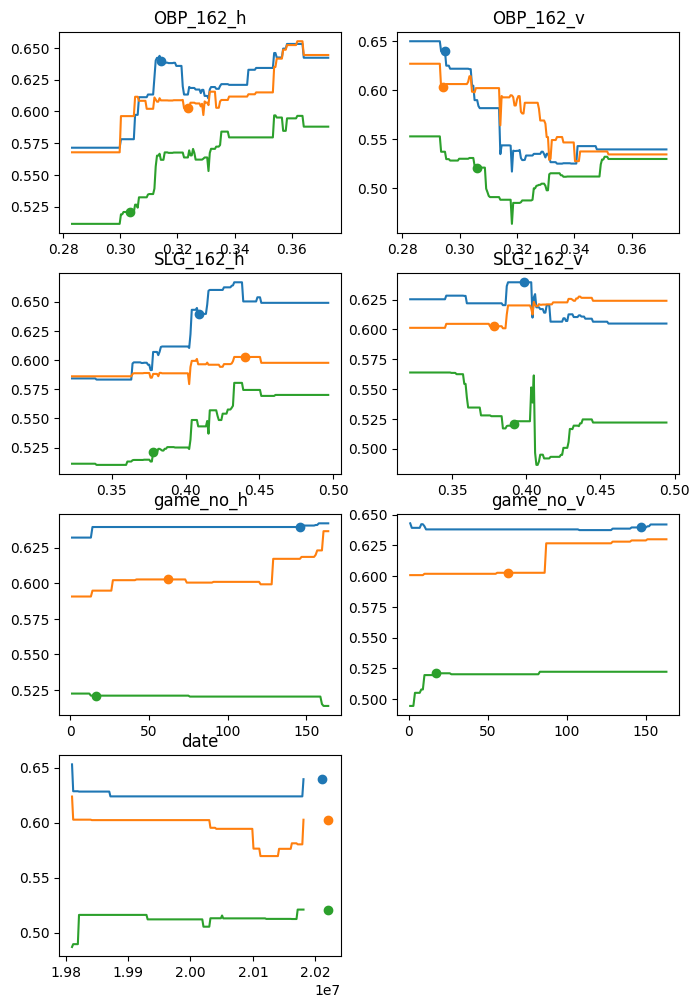

In [ ]:
#This gives an insight what the model is doing and thinking
#As home team does more on base perdentage more likely to win and as visiting team does more on base percentage home team less likely to win
mli.ice_plot(lgbm1, plot_pts, X_test.columns, mli.get_range_dict(X_train), plots_per_row=2)

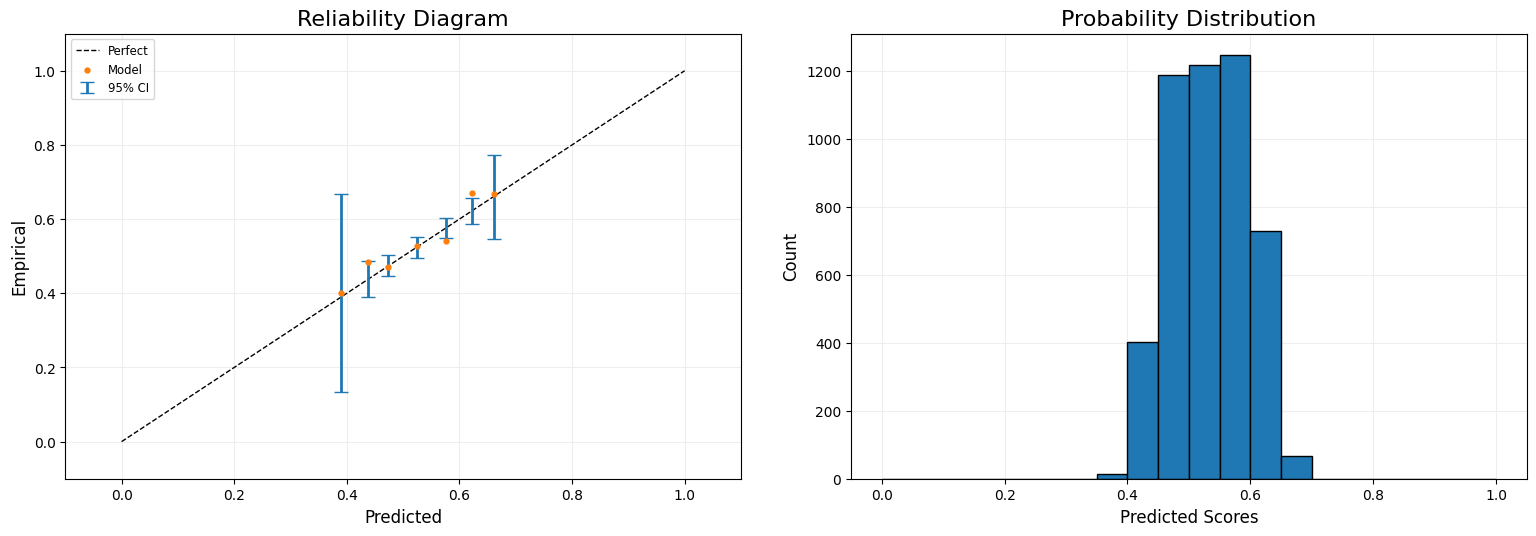

In [ ]:
plt.figure(figsize=(16,6))
mli.plot_reliability_diagram(y_test, preds_lgbm, show_histogram=True);